In [103]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [104]:
# Load the CSV file into a DataFrame
df = pd.read_csv('test.csv')

print(df.head())
print(df.describe())
print(df.info())

       textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive
            textID                                               text  \
count         3534                                               3534   
unique        3534                                               3534   
top     f87dea47db  Last session of the day  http://twitpic.com/67ezh   
freq             1                                                  1   

       sentiment  
count       3534  
unique         3  
top      neutral  
freq        1430  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (t

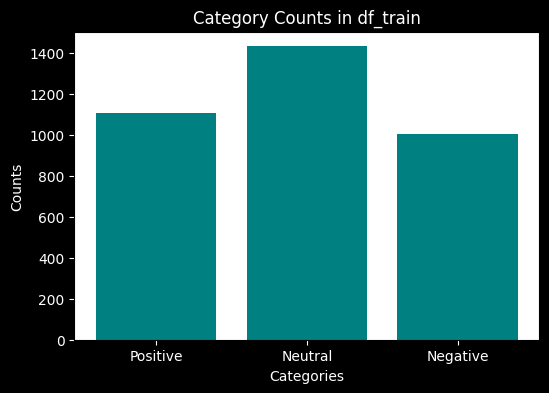

In [105]:
# Bar plot
labels = ['Positive', 'Neutral', 'Negative']
counts = [len(df[df['sentiment'] == 'positive']), len(df[df['sentiment'] == 'neutral']), len(df[df['sentiment'] == 'negative'])]
plt.figure(figsize=(6, 4), facecolor='black')
plt.bar(labels, counts, color = '#008080')
plt.xlabel('Categories', color = '#fff')
plt.ylabel('Counts', color = '#fff')
plt.title('Category Counts in df_train', color = '#fff')
plt.tick_params(colors='white') 
plt.show()

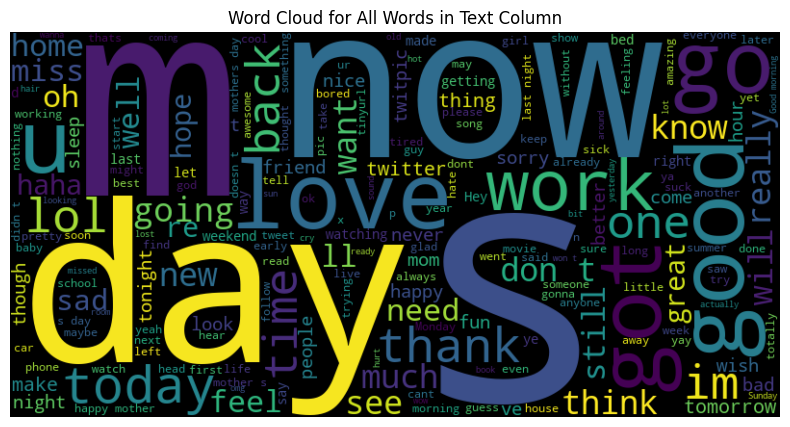

In [106]:
# Generate word cloud for the words in the 'text' column
all_words = df['text'].str.cat(sep=' ')  # Combine all words in the 'text' column
wordcloud_words = WordCloud(width=800, height=400, background_color='black').generate(all_words)

# Plot the word cloud for all words in the 'text' column
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_words, interpolation='bilinear')
plt.title('Word Cloud for All Words in Text Column')
plt.axis('off')
plt.show()

In [107]:
# Function to clean the text by removing URLs and special characters, and converting to lowercase
def cleanTxt(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    # Remove special characters, keeping only alphanumeric characters and spaces
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [108]:
# Apply the cleanTxt function to the 'text' column
df['text'] = df['text'].apply(cleanTxt)

print(df.head())

       textID                                               text sentiment
0  f87dea47db                          last session of the day     neutral
1  96d74cb729   shanghai is also really exciting precisely  s...  positive
2  eee518ae67  recession hit veronique branquinho she has to ...  negative
3  01082688c6                                         happy bday  positive
4  33987a8ee5                                          i like it  positive


In [109]:
# Create an instance of SentimentIntensityAnalyzer for sentiment analysis
sid = SentimentIntensityAnalyzer()

In [110]:
# Function to get selected phrases based on sentiment
def getSelectedPhrases(text, sentiment):
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)
    # Use a set to automatically remove duplicate phrases
    phrases = set()
    # Loop through the tokens and create phrases of consecutive word pairs
    for i in range(len(tokens) - 1):
        phrase = tokens[i] + " " + tokens[i + 1]
        # Get the sentiment score of the phrase using SentimentIntensityAnalyzer
        sentiment_score = sid.polarity_scores(phrase)["compound"]
        # Check the sentiment condition and add the phrase to the set if it meets the criteria
        if sentiment == 'positive':
            if sentiment_score > 0:
                phrases.add(phrase)
        elif sentiment == 'negative':
            if sentiment_score < 0:
                phrases.add(phrase)
        else:
            # If sentiment is 'neutral', add the entire text as the phrase
            phrases.add(text)
    # Convert the set of phrases back to a list before returning
    return list(phrases)

In [114]:
# Apply the getSelectedPhrases function to each row of the DataFrame and create a new column 'new' to store the selected phrases
df['new'] = [getSelectedPhrases(row['text'], row['sentiment']) for _, row in df.iterrows()]

print(df.head())

       textID                                               text sentiment  \
0  f87dea47db                          last session of the day     neutral   
1  96d74cb729   shanghai is also really exciting precisely  s...  positive   
2  eee518ae67  recession hit veronique branquinho she has to ...  negative   
3  01082688c6                                         happy bday  positive   
4  33987a8ee5                                          i like it  positive   

                                                 new  
0                        [last session of the day  ]  
1  [exciting precisely, galore good, good tweeps,...  
2                           [a shame, recession hit]  
3                                       [happy bday]  
4                                  [like it, i like]  


In [112]:
# Save the DataFrame to a new CSV file
df.to_csv('submission.csv')

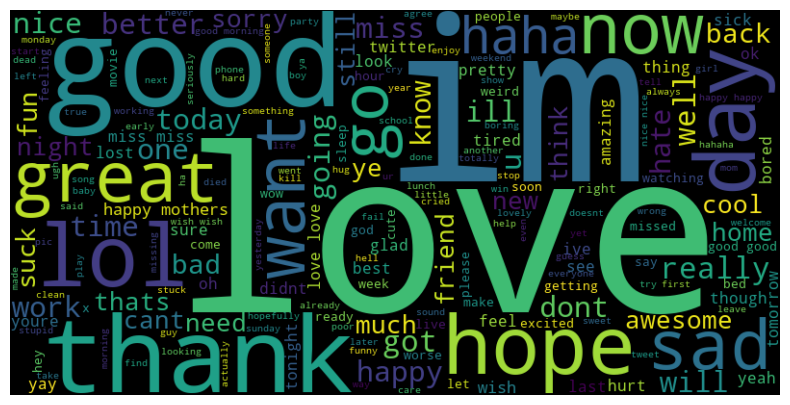

In [113]:
# Generate word cloud for the selected phrases
all_phrases = df['new'].sum()  # Combine all phrases from the 'new' column
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(all_phrases))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()